Salim Chemlal Fri Oct 07 2016 00:44:36 

CPython 2.7.11
IPython 4.1.2


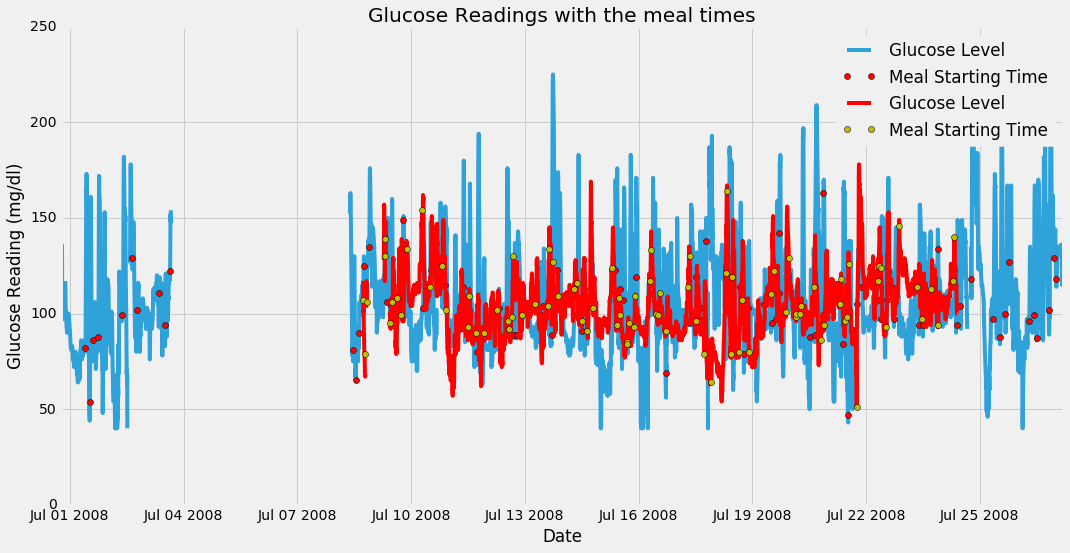

In [3]:
#An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 
#%load_ext watermark 
%watermark -a "Salim Chemlal" -n -t -v 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

#####################ALL comments are removed from this file, refer to original one patient code for comments##########

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P1.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P1 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P1 = df_P1.sort(['Date'])

_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P2.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P2 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P2 = df_P2.sort(['Date'])

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

df_P1_wonan_mg = df_P1.dropna(subset=['mg/dL'])
df_P2_wonan_mg = df_P2.dropna(subset=['mg/dL'])
###################
df_P12= pd.DataFrame(df_P1).convert_objects(convert_numeric=True)
df_P22= pd.DataFrame(df_P2).convert_objects(convert_numeric=True)

df_P12 = df_P12.dropna(subset=['CHO (g)'])
df_P22 = df_P22.dropna(subset=['CHO (g)'])

df_P12_wonan_mg = df_P12.dropna(subset=['mg/dL'])
df_P22_wonan_mg = df_P22.dropna(subset=['mg/dL'])
########################
#resetting dataframe index
df_P13 = df_P12_wonan_mg.reset_index(drop=True)
df_P23 = df_P22_wonan_mg.reset_index(drop=True)

df_P14 = pd.DataFrame(df_P13)
df_P24 = pd.DataFrame(df_P23) 

row = 0
for i, x in enumerate(df_P13['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P13['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P14.drop(df_P14.index[row], axis=0, inplace=True)
                row = row - 1

row = 0
for i, x in enumerate(df_P23['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P23['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P24.drop(df_P24.index[row], axis=0, inplace=True)
                row = row - 1
                

df_P14 = df_P14.reset_index(drop=True)
df_P24 = df_P24.reset_index(drop=True)

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P1.Date, df_P1['mg/dL'], '-', label="P1 Glucose");
plt.plot_date(df_P14.Date, df_P14['mg/dL'], 'ro', label="P1 Meals")

plt.plot_date(df_P2.Date, df_P2['mg/dL'], '-', color='r', label="P2 Glucose");
plt.plot_date(df_P24.Date, df_P24['mg/dL'], 'ro', color='y', label="P2 Meals")

plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.savefig(fig_path, dpi=_FIG_DPI)


In [15]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")

plot = figure(plot_width=1850, plot_height=900, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

s_P1 = plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
s_P2 = plot.line(df_P2.Date, df_P2['mg/dL'],  line_width=2, color='crimson', line_alpha=0.6)

plot.add_tools(HoverTool(renderers=[s_P13], tooltips= [
    ('Glucose (mg/dL)', '@y1'),
    ('Meal Size (grams)', '@z1')
]))

plot.add_tools(HoverTool(renderers=[s_P23], tooltips= [
    ('Glucose (mg/dL)', '@y2'),
    ('Meal Size (grams)', '@z2')
]))

# show the results
show(plot)